
*   A small dataset is provided with two features (Feature1 and Feature2) and a binary label (0 or 1) for two classes.

*   Extract the feature matrix X and the label vector y from the dataset.

*  Create a scatter plot of the original data points using Feature1 and Feature2.

*   Compute the mean vectors for each class (Class 0 and Class 1) based on the original data.

*   Compute the scatter matrices for each class and sum them to get the within-class scatter matrix.
*   Compute the between-class scatter matrix based on the mean vectors of the classes and the overall mean.


*   Solve the eigenvalue problem for the generalized eigenvalue equation.
Obtain eigenvalues and eigenvectors, and sort them in descending order.


*   Multiply the original data matrix
X by the selected eigenvectors to obtain the new feature matrix X lda



*   Create a scatter plot of the data points after LDA.





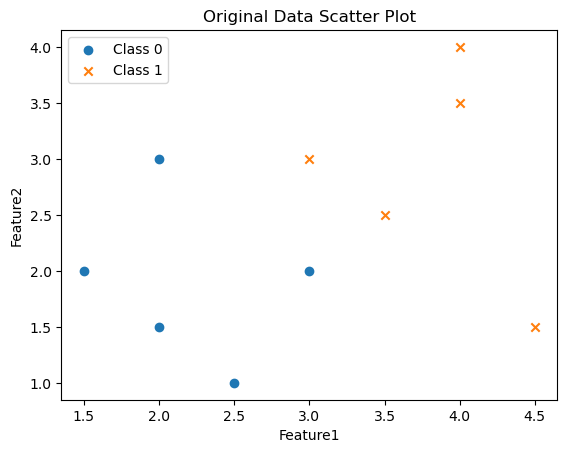

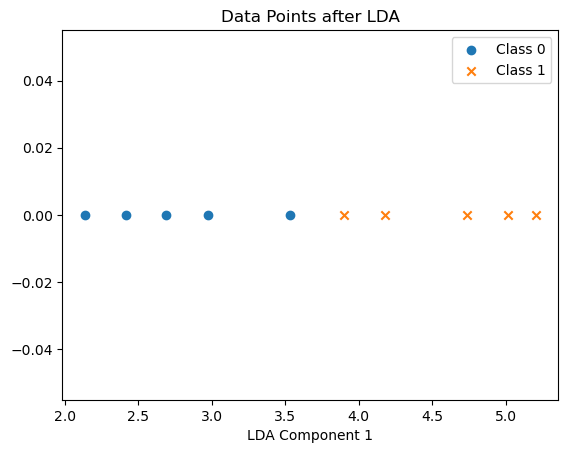

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset with two features and ten samples
data = {
    'Feature1': [2.5, 3.0, 4.5, 2.0, 3.5, 4.0, 1.5, 2.0, 3.0, 4.0],
    'Feature2': [1.0, 2.0, 1.5, 3.0, 2.5, 3.5, 2.0, 1.5, 3.0, 4.0],
    'Label': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # Assuming two classes (0 and 1)
}
df = pd.DataFrame(data)

# Extract the feature matrix X and the label vector y
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Create a scatter plot of the original data points using Feature1 and Feature2
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.title('Original Data Scatter Plot')
plt.show()

# Compute mean vectors for each class
mean_vectors = [np.mean(X[y == label], axis=0) for label in np.unique(y)]

# Compute the scatter matrices for each class
scatter_matrices = [np.cov(X[y == label], rowvar=False) for label in np.unique(y)]

# Compute the within-class scatter matrix
within_class_scatter_matrix = sum(scatter_matrices)

# Compute the overall mean
overall_mean = np.mean(X, axis=0)

# Compute the between-class scatter matrix
between_class_scatter_matrix = sum([np.outer(mean_vector - overall_mean, mean_vector - overall_mean)
                                   for mean_vector in mean_vectors])

# Solve the eigenvalue problem for the generalized eigenvalue equation
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Multiply the original data matrix X by the selected eigenvectors to obtain the new feature matrix X_lda
X_lda = X.dot(eigenvectors)

# Create a scatter plot of the data points after LDA
plt.scatter(X_lda[y == 0, 0], np.zeros((sum(y == 0), 1)), label='Class 0', marker='o')
plt.scatter(X_lda[y == 1, 0], np.zeros((sum(y == 1), 1)), label='Class 1', marker='x')
plt.xlabel('LDA Component 1')
plt.title('Data Points after LDA')
plt.legend()
plt.show()
